In [1]:
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def Data_gen(n=10):
    TrainSet=[]
    States=["A","B","C","D","E","F","G"]
    startP="D"
    for i in range(n):
        curP=startP
        seq=[curP]
        cur_ind=States.index(curP)
        while cur_ind!=0 and cur_ind!=6:
            cur_ind=States.index(curP)
            rand=random.uniform(0, 1)
            if rand<=0.5:
                cur_ind+=-1
            else:
                cur_ind+=1
            curP=States[cur_ind]
            seq.append(curP)
            
        TrainSet.append(seq)
    return TrainSet

In [3]:
def learn_oneset(Trainset,alpha,lamd,w):
    States=["A","B","C","D","E","F","G"]
    X=[np.array([1,0,0,0,0]),np.array([0,1,0,0,0]),np.array([0,0,1,0,0]),np.array([0,0,0,1,0]),np.array([0,0,0,0,1])]
    test=1
    P_act = np.array([1/6,2/6,3/6,4/6,5/6])

    P = np.zeros(7)
    for s in range(7):
        if s == 0:
            P[s] = 0.0
        elif s == 6:
            P[s] = 1.0
        else:
            px = X[s-1]
            P[s] = np.dot(np.transpose(px),w)
    
    delta_w = np.zeros(5)
    for m in range(len(Trainset)):
        Trainset_use = Trainset[m]
        for i in range(len(Trainset_use)-1):
            ind_1 = States.index(Trainset_use[i])
            ind_2 = States.index(Trainset_use[i+1])
            sum = np.zeros(5)
            for j in range(i+1):
                sum += (lamd**(i-j))*X[States.index(Trainset_use[j])-1]
            delta_w += alpha*(P[ind_2]-P[ind_1])*sum
        w += delta_w
        for s in range(7):
            if s == 0:
                P[s] = 0
            elif s == 6:
                P[s] = 1
            else:
                px = X[s-1]
                P[s] = np.dot(np.transpose(px),w)
        delta_w = np.zeros(5)
                
    RMSE = np.linalg.norm(P[1:6]-P_act)/np.sqrt(5)  
    return [w,P,RMSE]


alpha1 = np.array([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])
alpha2 = np.array([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
lamda = np.array([0.0, 0.1, 0.3, 0.8, 1.0])
#lamda = np.array([0.1, 0.3])

RMSE_total = np.zeros([len(lamda),len(alpha1)])

Trainset = []
for i in range (100):
    data = Data_gen(10)
    Trainset.append(data)

lamda_alpha = np.zeros([2,11])

for iter in range(len(lamda)):
    if lamda[iter] < 1.0:
        alpha_use = alpha1
    else: 
        alpha_use = alpha2
    for iter2 in range(len(alpha_use)):
        w = np.array([0.5,0.5,0.5,0.5,0.5])
        for i in range (100):
            w = np.array([0.5,0.5,0.5,0.5,0.5])
            [weights,P,RMSE] = learn_oneset(Trainset[i],alpha_use[iter2],lamda[iter],w)
            RMSE_total[iter,iter2] += RMSE
        RMSE_total[iter,iter2] /= 100
        if iter2 > 0 and RMSE_total[iter,iter2] < lamda_alpha[1,iter]:
            lamda_alpha[0,iter] = alpha_use[iter2]
            lamda_alpha[1,iter] = RMSE_total[iter,iter2]
        elif iter2 == 0:
            lamda_alpha[0,iter] = alpha_use[iter2]
            lamda_alpha[1,iter] = RMSE_total[iter,iter2]
        
print RMSE_total    

[[0.23570226 0.17487569 0.13075237 0.1025598  0.0900717  0.09321757
  0.11644891 0.17863587 0.32163525 0.65622051 1.41457608 3.07852239
  6.60589771]
 [0.23570226 0.17199526 0.12695768 0.09928364 0.08810859 0.09181887
  0.1094573  0.14831509 0.22913998 0.39835886 0.75266799 1.44956252
  2.75848126]
 [0.23570226 0.16581738 0.11964643 0.09451943 0.08808167 0.09591864
  0.11204878 0.13579847 0.17286419 0.2360261  0.34087998 0.50198232
  0.93410476]
 [0.23570226 0.15077738 0.11629509 0.11586288 0.13323173 0.15811963
  0.1875928  0.22253577 0.26510784 0.31769906 0.38405461 0.48873419
  0.67909038]
 [0.23570226 0.18344154 0.21640158 0.27315794 0.33455089 0.39996247
  0.47323678 0.56580312 0.70052998 0.         0.         0.
  0.        ]]


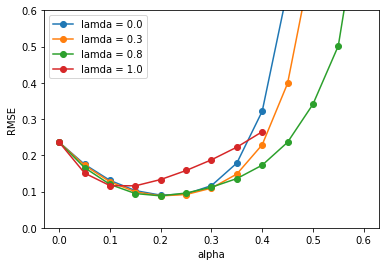

In [4]:
plt.plot(alpha1,RMSE_total[0,], marker='o')
plt.plot(alpha1,RMSE_total[1,], marker='o')
plt.plot(alpha1,RMSE_total[2,], marker='o')
plt.plot(alpha2,RMSE_total[3,0:9], marker='o')
plt.legend(['lamda = 0.0','lamda = 0.3', 'lamda = 0.8', 'lamda = 1.0'], loc='upper left')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.ylim(0,0.6)
plt.show()


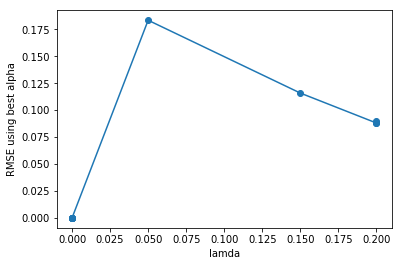

In [5]:
plt.plot(lamda_alpha[0,],lamda_alpha[1,], marker='o')
plt.xlabel('lamda')
plt.ylabel('RMSE using best alpha')
plt.show()

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [14]:
P_act = np.array([1/6,2/6,3/6,4/6,5/6])
print P[1:5]-P_act[1:5]
print P_act[1:5]

[-0.39813333 -0.3494144   0.15723027  0.15842987]
[0.33333333 0.5        0.66666667 0.83333333]
